In [191]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import normalize

Load and visualize training data

In [194]:
train = np.loadtxt("ex2data1.txt", delimiter=',')
X = train[:, 0:2]
y = train[:, 2]

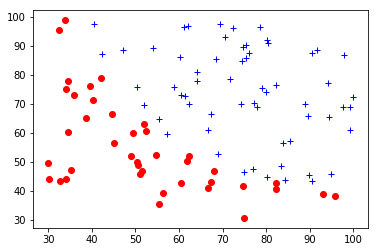

In [195]:
plt.plot(X[y==0, 0], X[y==0, 1], 'ro')
plt.plot(X[y==1, 0], X[y==1, 1], 'b+')
# plt.plot(np.arange(100), hypothesis(theta, X))


Define Sigmoid activation function as formular, and visualize this function
$$\frac{1}{1 + e^{-z}}$$

In [196]:
def sigmoid(value):
    return 1 / (1 + math.e ** (-value))

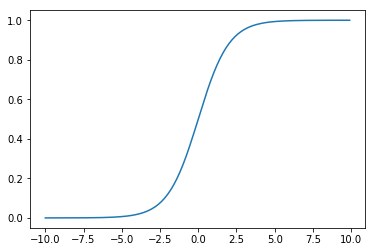

In [197]:
_x = np.arange(-10, 10, 0.1)
plt.plot(_x , sigmoid(_x))

Cost function of logistic regression formular
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m\left[-y^{(i)}log(h_\theta(x^{(i)}))  -  (1-y^{(i)})log(1 - h_\theta(x^{(i)}))\right]$$

Add bias column to X 

In [198]:
def cost(theta, X, y):
    return (1/m) * ( np.dot(-y.T, np.log(sigmoid(np.dot(X, theta)))) - np.dot((1-y).T, np.log(1 - sigmoid(np.dot(X, theta))) ) )

In [199]:
def hypothesis(theta, data):
    return np.dot(data, theta)

In [200]:
def plot_decision_boundaty(theta, data):
    plt.plot(np.arange(100), hypothesis(theta, data))

In [201]:
def visualize_logistic_regression(theta, data):
    plt.plot(data[y==0, 1], data[y==0, 2], 'ro')
    plt.plot(data[y==1, 1], data[y==1, 2], 'b+')
    plt.plot(np.arange(100), hypothesis(theta, data))

In [207]:
def plot_cost_function(J, num_iterations):
    plt.plot(np.arange(num_iterations), J)

Compute gradient of logistic regression following below fomular
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [203]:
def gradient(theta, X, y, alpha):
    return (alpha/m) * np.dot(X.T, (sigmoid(np.dot(X, theta)) - np.reshape(y, (m, 1))))

Training and visualize logistic regession model while training

In [238]:
theta = np.zeros((3, 1)) # initial theta
num_iterations = 500 
alpha = 10
J_history = np.zeros(num_iterations)

Normalize X before training to avoid numerial overflow

In [224]:
norm_X = normalize(X, axis=1, norm='l1')
norm_X = np.column_stack([ np.ones(m) , norm_X])


In [225]:
for i in range(num_iterations):
#     visualize_logistic_regression(theta, norm_X)
    J_history[i] = cost(theta, norm_X, y)
    theta = theta - gradient(theta, norm_X, y, alpha)
    

In [228]:
theta

array([[ 0.27591692],
       [ 0.89820907],
       [-0.62229215]])

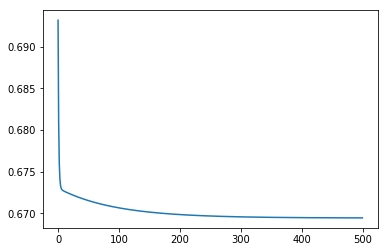

In [226]:
plot_cost_function(J_history, num_iterations)

In [236]:
new_X = normalize(X, axis=1, norm='l1')

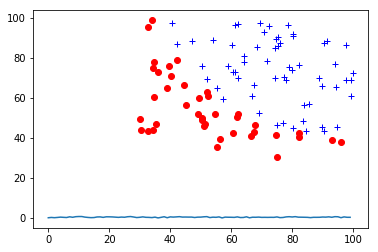

In [237]:
plt.plot(X[y==0, 0], X[y==0, 1], 'ro')
plt.plot(X[y==1, 0], X[y==1, 1], 'b+')
plt.plot(np.arange(100), hypothesis(theta, np.column_stack([ np.ones(m) , new_X])))